<a href="https://colab.research.google.com/github/nazmulshuvo03/fastAi/blob/master/chest_xray_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Upload kaggle api token

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazmulshuvo03","key":"ad3b5c0bf9341221fa7807bce2142eef"}'}

### Create directories and download dataset

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 25.8MB/s]
100% 2.29G/2.29G [00:30<00:00, 80.2MB/s]


### Load essential libraries
<p>Install specific version of Pytorch to avoid warnings</p>

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

from fastai import *
from fastai.vision import *
from pathlib import Path

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 30.7MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


### Unzip dataset

In [ ]:
import zipfile
with zipfile.ZipFile("chest-xray-pneumonia.zip") as zip_ref:
    zip_ref.extractall()

### Remove unnecessary folders

In [ ]:
%ls chest_xray/
%rm -rf chest_xray/__MACOSX
%rm -rf chest_xray/chest_xray
%mv /content/chest_xray/val /content/chest_xray/valid
%ls chest_xray/

models/  test/  train/  val/
models/  test/  train/  valid/


# Process Files

In [ ]:
path = Path('chest_xray')
path.ls()

[PosixPath('chest_xray/models'),
 PosixPath('chest_xray/valid'),
 PosixPath('chest_xray/train'),
 PosixPath('chest_xray/test')]

In [ ]:
fnames = get_image_files(path/'valid'/'NORMAL')
fnames[:5]

[PosixPath('chest_xray/valid/NORMAL/NORMAL2-IM-1437-0001.jpeg'),
 PosixPath('chest_xray/valid/NORMAL/NORMAL2-IM-1431-0001.jpeg'),
 PosixPath('chest_xray/valid/NORMAL/NORMAL2-IM-1430-0001.jpeg'),
 PosixPath('chest_xray/valid/NORMAL/NORMAL2-IM-1442-0001.jpeg'),
 PosixPath('chest_xray/valid/NORMAL/NORMAL2-IM-1440-0001.jpeg')]

In [ ]:
bs = 64

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs)

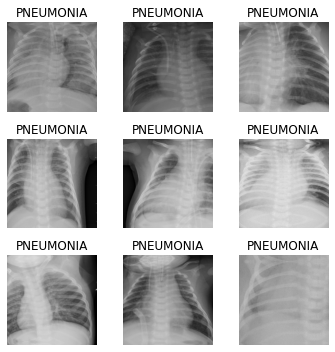

In [ ]:
data.show_batch(rows=3, cols=6, figsize=(5,5))

In [ ]:
print(data.classes)

['NORMAL', 'PNEUMONIA']


In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


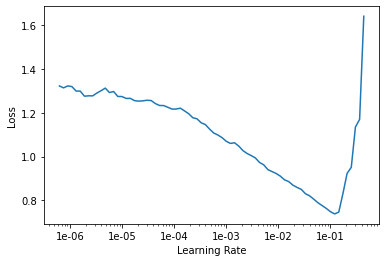

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.478505,1.409901,0.312500,03:21
1,0.296031,0.560884,0.250000,03:26
2,0.186872,0.300396,0.187500,03:24
3,0.158933,0.428990,0.187500,03:24
4,0.139644,0.303545,0.125000,03:24
5,0.123247,0.334992,0.125000,03:23


In [ ]:
learn.save('stage-resnet34')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

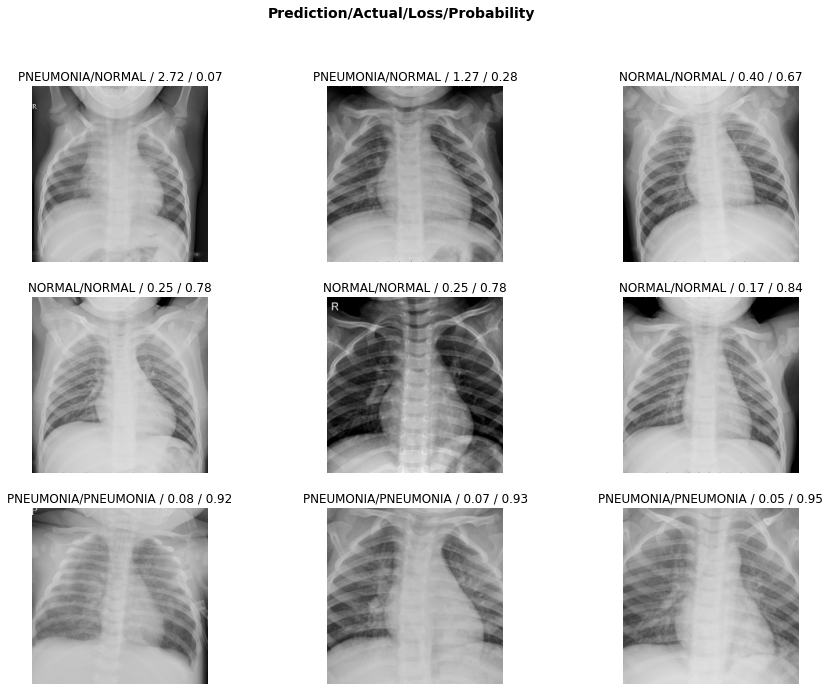

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

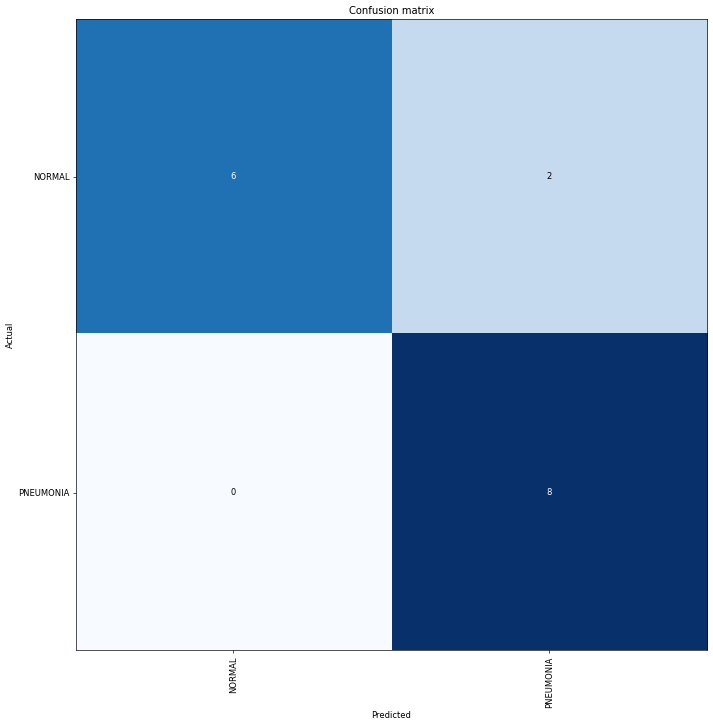

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('NORMAL', 'PNEUMONIA', 2)]